In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import h3

In [2]:
data = pd.read_csv('../datasets/uber_super_cleaned.csv',low_memory=False)

In [3]:
dataX = data.drop(columns=['fare','expensive'])
datay = data[['fare','expensive']]
X_train,X_test,y_train,y_test = train_test_split(dataX.values,datay.values,random_state=0,test_size=0.2)
cols = []
for cs in dataX.columns:
    cols.append(cs)
for cs in datay.columns:
    cols.append(cs)
pd.DataFrame(np.hstack((X_train,y_train)),columns=cols).to_csv('../datasets/uber_cleaned_train.csv',index=False)
pd.DataFrame(np.hstack((X_test,y_test)),columns=cols).to_csv('../datasets/uber_cleaned_test.csv',index=False)

In [4]:
data

,datetime,pick_lon,pick_lat,drop_lon,drop_lat,passenger,fare,year,quarter,month,dayofmonth,dayofweek,hour,isweekend,large,distance,duration,expensive,h3_dist
0,2013-01-06 08:10:48-05:00,-73.985744,40.735861,-73.989381,40.726139,1,5.0,2013,1,1,6,6,8,True,False,1304.66,116.8,False,1123.637422
1,2009-08-26 13:40:00-04:00,-73.962452,40.758655,-73.971883,40.759078,1,6.9,2009,3,8,26,2,13,False,False,706.18,62.2,False,795.729061
2,2015-06-18 06:39:24-04:00,-74.006493,40.733189,-73.979118,40.756001,1,18.0,2015,2,6,18,3,6,False,False,14697.20,1137.4,False,3428.177893
3,2013-09-13 00:04:30-04:00,-74.003520,40.751727,-73.988823,40.719187,1,11.5,2013,3,9,13,4,0,False,False,0.10,-1.0,True,3824.318194
4,2010-08-31 16:10:00-04:00,-73.987437,40.742623,-73.976050,40.745730,5,5.7,2010,3,8,31,1,16,False,True,1312.38,117.6,False,1019.611516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192672,2014-07-21 11:16:50-04:00,-73.992470,40.753686,-73.956567,40.817879,1,20.0,2014,3,7,21,0,11,False,False,21891.07,1520.3,False,7751.597192
192673,2012-11-08 21:08:00-05:00,-73.990407,40.718727,-74.009650,40.723490,1,9.0,2012,4,11,8,3,21,False,False,2160.89,193.4,False,1705.979068
192674,2010-10-18 06:48:00-04:00,-73.992672,40.751582,-73.993087,40.736793,5,8.5,2010,4,10,18,0,6,False,True,230.78,20.7,False,1644.835227
192675,2015-02-09 11:12:43-05:00,-73.981934,40.758080,-73.952110,40.791424,1,14.0,2015,1,2,9,0,11,False,False,13424.30,1005.0,False,4478.149178


In [5]:
data.describe()

,pick_lon,pick_lat,drop_lon,drop_lat,passenger,fare,year,quarter,month,dayofmonth,dayofweek,hour,distance,duration,h3_dist
count,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000,192677.000000
mean,-73.975595,40.750896,-73.974653,40.751184,1.689143,11.353084,2011.747552,2.429730,6.288125,15.720314,2.991826,11.812692,7120.105943,524.230603,3367.672938
std,0.036626,0.027580,0.036422,0.031361,1.304794,9.738416,1.863253,1.117112,3.441241,8.687029,1.903228,5.844275,7882.543176,549.840784,3804.678057
min,-75.419276,40.002405,-75.458979,39.653763,1.000000,0.010000,2008.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.100000,-1.000000,0.084196
25%,-73.992277,40.736495,-73.991600,40.735371,1.000000,6.000000,2010.000000,1.000000,3.000000,8.000000,1.000000,7.000000,550.500000,49.300000,1281.155351
50%,-73.982140,40.753311,-73.980591,40.753761,1.000000,8.500000,2012.000000,2.000000,6.000000,16.000000,3.000000,12.000000,2497.360000,220.700000,2181.186048
75%,-73.968520,40.767541,-73.965619,40.768325,2.000000,12.500000,2013.000000,3.000000,9.000000,23.000000,5.000000,17.000000,13932.940000,1053.400000,3941.000769
max,-73.137393,41.366138,-73.101445,41.500000,6.000000,499.000000,2015.000000,4.000000,12.000000,31.000000,6.000000,23.000000,103295.060000,4775.900000,176519.280838


In [6]:
data.describe(include=bool)

,isweekend,large,expensive
count,192677,192677,192677
unique,2,2,2
top,False,False,False
freq,141812,170906,152006


In [7]:
data.isweekend.mean(), data.isweekend.std()

(0.26399103162287146, 0.4407956162134678)

In [8]:
data.large.mean(), data.large.std()

(0.11299220976037617, 0.3165840969907559)

In [9]:
data.expensive.mean(), data.expensive.std()

(0.21108383460402644, 0.4080788081490386)

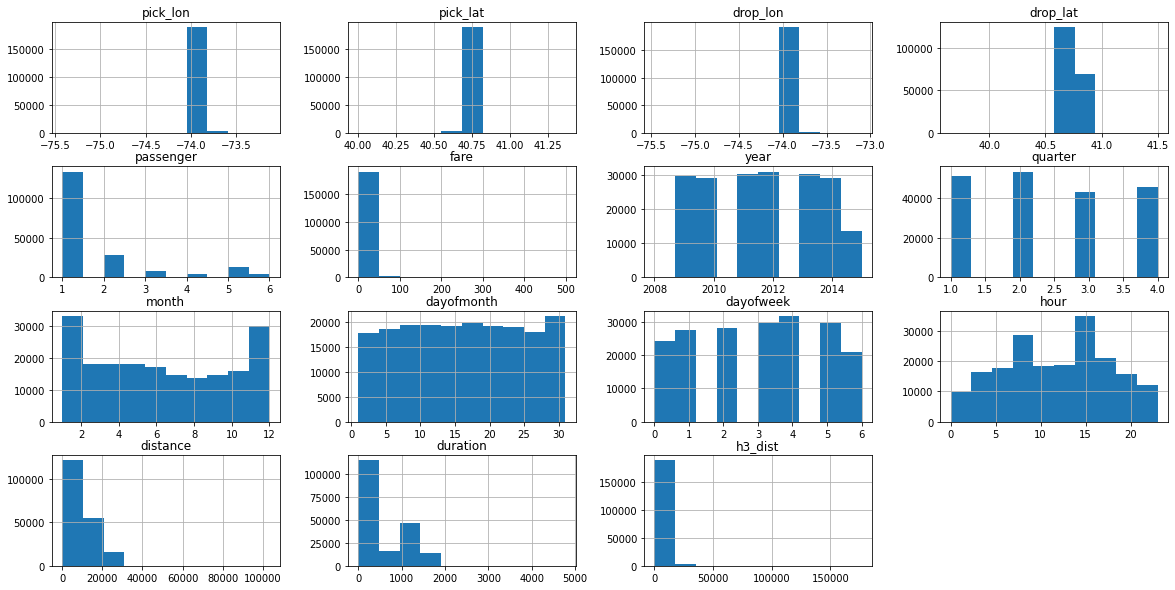

In [10]:
data.hist(figsize=(20,10))
plt.show()

In [11]:
cols = ['passenger', 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek', 'hour', 'distance', 'h3_dist','duration', 'fare']
bin_cols = ['isweekend', 'large','expensive']

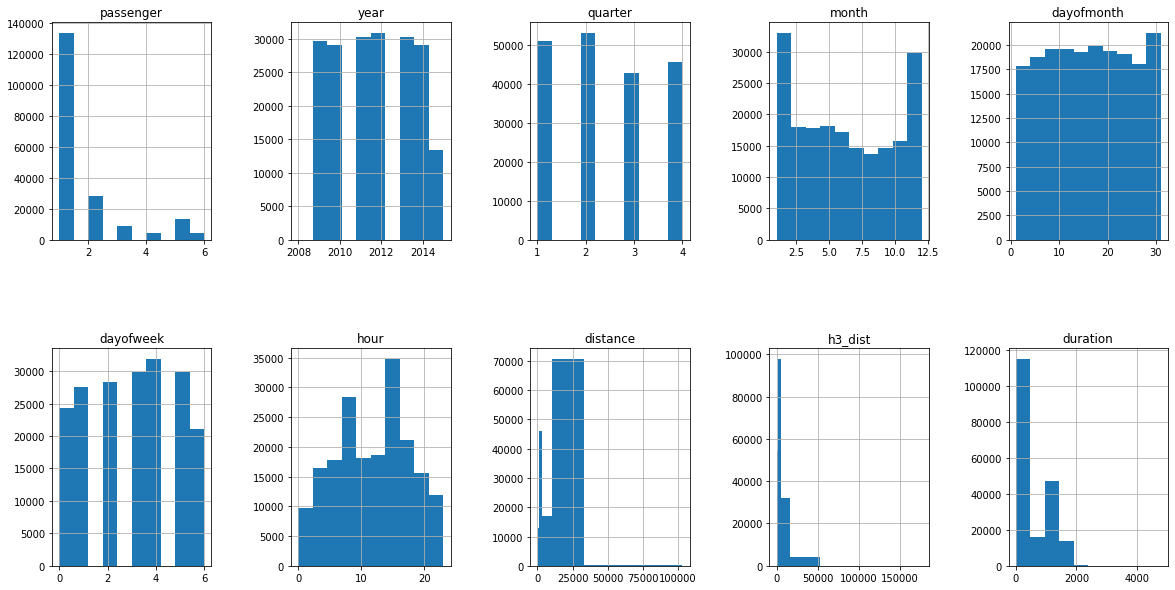

In [12]:
fig,axs = plt.subplots(2,5,figsize=(20,10))
fig.subplots_adjust(hspace = .5, wspace=.5)
for ax, col in zip(axs.ravel(), cols):
    try:
        if col in ['distance','h3_dist','fare']:
            _, bins = np.histogram(np.log10(data[col] + 1), bins=10)
            data[col].hist(ax=ax,bins=10**bins)
        else:
            data[col].hist(ax=ax)
    except:
        data[col].astype(float).hist(ax=ax)
    ax.set_title(col)


plt.savefig('./figs/cols.png',bbox_inches='tight')

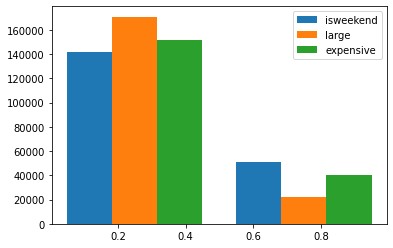

In [13]:
plt.hist(data[bin_cols].astype(float), bins = 2, label=bin_cols)
plt.legend(bin_cols)
plt.savefig('./figs/bin_cols.png',bbox_inches='tight')

In [23]:
corr = data.corr()
fare_corr = corr.fare.sort_values()
print(fare_corr)
print("The top five most strongly positively correlated covariates to 'fare' are\n{}.".format([key for key in fare_corr.keys()[-6:-1][::-1] if fare_corr[key] >= 0]))
print("The top five most strongly negatively correlated covariates to 'fare' are\n{}.".format([key for key in fare_corr.keys()[:5] if fare_corr[key] <= 0]))
expensive_corr = corr.expensive.sort_values()
print("The top five most strongly positively correlated covariates to 'expensive' are\n{}.".format([key for key in expensive_corr.keys()[-6:-1][::-1] if expensive_corr[key] >= 0]))
print("The top five most strongly negatively correlated covariates to 'expensive' are\n{}.".format([key for key in expensive_corr.keys()[:5] if expensive_corr[key] <= 0]))

pick_lat     -0.205779
drop_lat     -0.165548
expensive    -0.052352
hour         -0.007789
dayofmonth    0.000930
isweekend     0.000989
large         0.005719
dayofweek     0.008277
passenger     0.012054
quarter       0.022918
month         0.025043
year          0.121231
drop_lon      0.294153
duration      0.366793
pick_lon      0.402746
distance      0.412310
h3_dist       0.832431
fare          1.000000
Name: fare, dtype: float64
The top five most strongly positively correlated covariates to 'fare' are
['h3_dist', 'distance', 'pick_lon', 'duration', 'drop_lon'].
The top five most strongly negatively correlated covariates to 'fare' are
['pick_lat', 'drop_lat', 'expensive', 'hour'].
The top five most strongly positively correlated covariates to 'expensive' are
['drop_lat', 'pick_lat', 'year', 'month', 'quarter'].
The top five most strongly negatively correlated covariates to 'expensive' are
['duration', 'distance', 'passenger', 'large', 'h3_dist'].


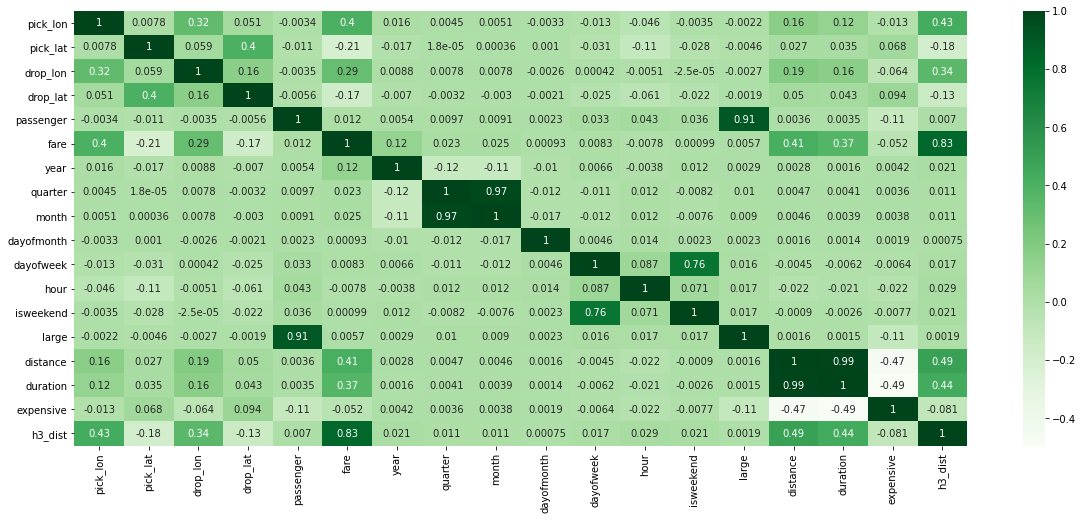

In [24]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), cmap="Greens",annot=True)
plt.savefig('./figs/corr.png',bbox_inches='tight')
plt.show()

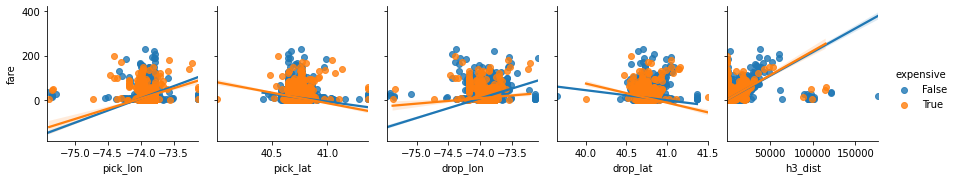

In [39]:
sns.pairplot(data,y_vars=['fare'],x_vars=['pick_lon','pick_lat','drop_lon','drop_lat','h3_dist'],kind='reg',hue='expensive')
plt.savefig('./figs/fareplot.png',bbox_inches='tight')

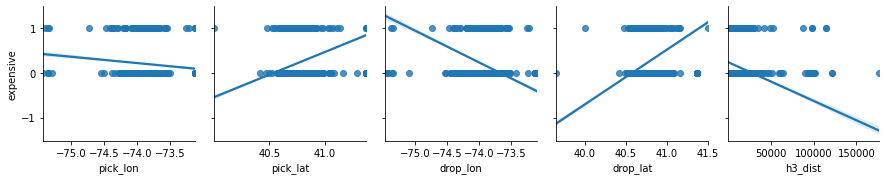

In [53]:
sns.pairplot(data,y_vars=['expensive'],x_vars=['pick_lon','pick_lat','drop_lon','drop_lat','h3_dist'],kind='reg')
plt.savefig('./figs/expensiveplot.png',bbox_inches='tight')

In [63]:
data[data.h3_dist>100000]

,datetime,pick_lon,pick_lat,drop_lon,drop_lat,passenger,fare,year,quarter,month,dayofmonth,dayofweek,hour,isweekend,large,distance,duration,expensive,h3_dist
16765,2010-05-03 07:45:32-04:00,-73.137393,41.366138,-74.006791,40.728763,1,6.1,2010,2,5,3,0,7,False,False,63282.06,3377.7,False,101677.068002
29780,2010-06-19 10:32:17-04:00,-73.137393,41.366138,-74.177279,40.691147,2,60.3,2010,2,6,19,5,10,True,False,0.10,-1.0,True,115073.539405
33971,2011-05-28 03:49:41-04:00,-73.967302,40.759383,-75.458979,39.653763,1,17.3,2011,2,5,28,5,3,True,False,103295.06,4775.9,False,176519.280838
83852,2010-07-31 19:33:13-04:00,-73.137393,41.366138,-73.984311,40.720673,1,13.3,2010,3,7,31,5,19,True,False,61078.08,3180.5,False,100974.474244
101147,2011-05-05 03:15:20-04:00,-73.986632,40.761410,-75.423067,40.773931,2,32.1,2011,2,5,5,3,3,False,False,82657.54,4202.5,False,120976.107620
115797,2011-03-06 10:59:15-05:00,-75.341033,40.642462,-73.991631,40.770451,1,45.0,2011,1,3,6,6,10,True,False,0.10,-1.0,True,114630.332006
143222,2010-06-11 14:55:30-04:00,-73.137393,41.366138,-73.988409,40.731239,1,4.5,2010,2,6,11,4,14,False,False,62836.89,3338.1,False,100382.765426
159740,2011-04-04 19:59:40-04:00,-75.419276,40.771689,-73.980900,40.764442,2,35.3,2011,2,4,4,0,19,False,False,84796.32,4349.4,False,121133.637454
